In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("ex_data.txt",names=["population","profit"])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.tail()

,population,profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


<AxesSubplot:xlabel='population', ylabel='profit'>

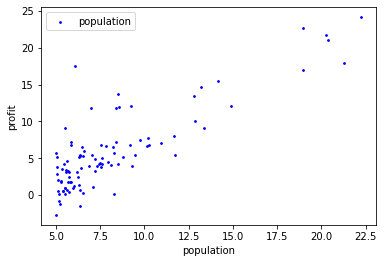

In [5]:
data.plot.scatter("population","profit",c="b",label="population",s=3) # 绘制散点图

In [6]:
data.insert(loc=0,column="ones",value=1)# 插入一列 1
data.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [7]:
X = data.iloc[:,0:-1]# 所有行，前两列
X.head()

,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [8]:
y = data.iloc[:,-1:]# 之前的错误写法是，y = data.iloc[:,-1]，然后reshape一下 todo 查询错误原因
y.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [9]:
X = X.values

In [10]:
X.shape

(97, 2)

In [11]:
y = y.values

In [12]:
def costFunction(X,y,theta):
    """
    损失函数
    """
    inner = np.power(X @ theta - y, 2)
    return np.sum(inner) / (2*len(X))

In [13]:
theta = np.zeros((2,1))
theta.shape
print(theta)

[[0.]
 [0.]]


In [14]:
cost_init = costFunction(X,y,theta)

In [15]:
print(cost_init)

32.072733877455676


In [16]:
def gradientDescent(X,y,theta,alpha,iters):
    """
    梯度下降函数 对代价函数求导 * 步长 alpha    
    X @ theta - y 求导得 X.T @ (X @ theta - y )
    """
    costs = []
    for i in range(iters):
        theta = theta - (X.T @ (X@theta -y )) * alpha / len(X)
        cost = costFunction(X,y,theta)
        costs.append(cost)
#         if i % 100 == 0:
#             print(cost)
    return theta,costs

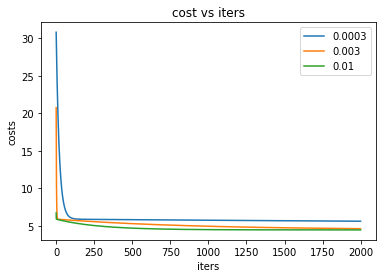

In [17]:
fig,ax = plt.subplots()
candinate_alpha = [0.0003,0.003,0.01]
iters = 2000
for alpha in candinate_alpha:
    _,costs = gradientDescent(X,y,theta,alpha,iters)
    ax.plot(np.arange(iters),costs,label=alpha)#绘图 列表
    ax.legend()
    
ax.set(xlabel="iters",ylabel="costs",title="cost vs iters")
plt.show()

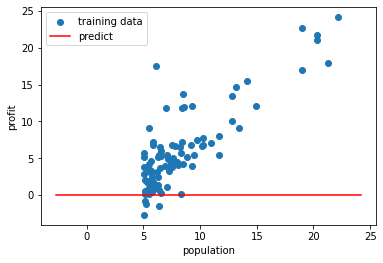

In [18]:
x = np.linspace(y.min(), y.max(), 100)
y_ = theta[0,0] + theta[1,0] * x
fig,ax = plt.subplots()
ax.scatter(X[:,1], y, label="training data")
ax.plot(x,y_,'r',label="predict")
ax.legend() # 显示标签
ax.set(xlabel="population", ylabel="profit")
plt.show()

### 正规方程

In [19]:
# 特征归一化 使所有特征值归一化到指定区间
def normaize_feature(data):
    return (data - data.mean()) / data.std()